In [1]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from tqdm import tqdm

In [2]:
%matplotlib inline

In [72]:
class KMedoids:
    def __init__(self, k: int=3):
        self.k = k
        
    def fit(self, X: ndarray, return_clusters: bool = False):
        self.n_samples, self.n_features = X.shape
        
        # initialize the cluster medoids randomly
        self.medoids: ndarray = X[np.random.choice(self.n_samples, size=self.k, replace=False)]
        
        if return_clusters:
            self.history = []
        
        while True:
            # assign all the points to its nearest medoid
            distances: ndarray = np.zeros((self.n_samples, self.k))
            
            for i in range(self.k):
                distances[:, i] = np.linalg.norm(X - self.medoids[i], axis=1)
            
            # cluster labels of the each row in the data
            self.labels: ndarray = np.argmin(distances, axis=1)
            
            if return_clusters:
                self.history.append((self.labels, self.medoids))
            
            # update the medoids
            new_medoids: ndarray = np.empty((self.k, self.n_features))
            for i in range(self.k):
                val: ndarray = X[self.labels == i]
                diff: ndarray = val[:, np.newaxis, :] - val[np.newaxis, :, :]
                dist_matrix: ndarray = np.sqrt(np.sum(np.power(diff, 2), axis=2))
                new_medoids[i] = val[np.argmin(np.sum(dist_matrix, axis=1))]

            
            # check if the centroids are not improving then stop
            if np.allclose(self.medoids, new_medoids):
                break
             
            self.medoids = new_medoids
            
    def cost_function(self):
        """ Cost function """
        return np.sum([np.sum(np.linalg.norm(X[self.labels == i] - self.medoids[i], axis=1)) for i in range(self.k)])
    
    
    def xb(self):
        """ Xie Beni Index """
        
        diff = self.medoids[:, np.newaxis, :] - self.medoids[np.newaxis, :, :]
        dist_matrix = np.tril(np.sqrt(np.sum(np.power(diff, 2), axis=2)))
        min_value = np.min(dist_matrix[np.nonzero(dist_matrix)])
        result = self.cost_function() / (self.n_samples * min_value)
        return result
    
    

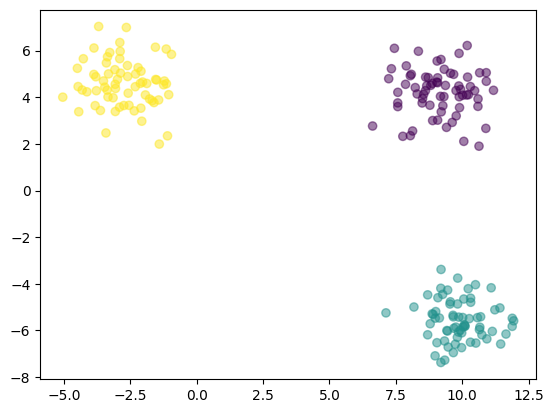

In [58]:
X, labels = make_blobs(n_samples=200, n_features=2, centers=3, random_state=24)

plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.5)
plt.show()

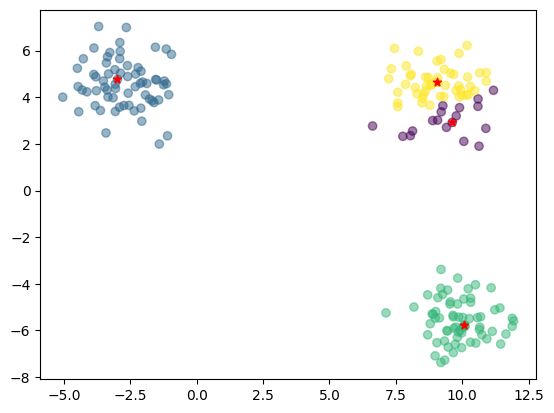

In [73]:
kmedoids = KMedoids(k=4)
kmedoids.fit(X, return_clusters=True)
labels = kmedoids.labels
medoids = kmedoids.medoids
history = kmedoids.history


# plot the final result
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.5)
plt.scatter(medoids[:, 0], medoids[:, 1], c="red", marker="*")
plt.show()

In [74]:
len(history)

3

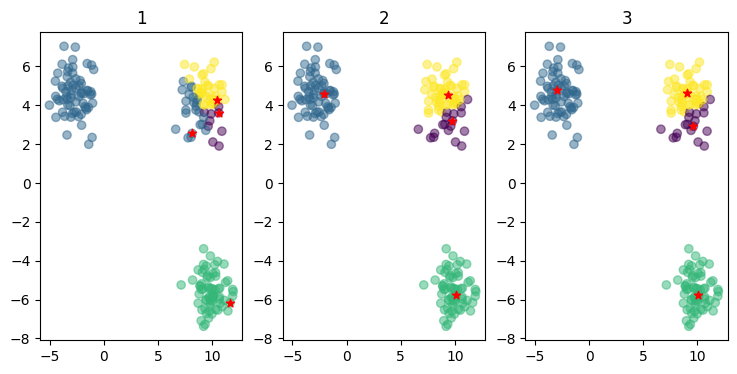

In [75]:
# plot the process
plt.figure(figsize=(12, 4))
for i, h in enumerate(history):
    plt.subplot(len(history) // 4 + 1, 4, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=h[0], alpha=0.5)
    plt.scatter(h[1][:, 0], h[1][:, 1], c="red", marker="*")
    plt.title(i + 1)

---
# Plot `J` vs `k`

In [76]:
js = []
for i in tqdm(range(2, int(np.ceil(np.sqrt(X.shape[0]))))):
    kmedoids = KMedoids(k=i)
    kmedoids.fit(X)
    js.append(kmedoids.cost_function())
    
print(js)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 26.09it/s]

[764.1662311154281, 742.8485692290811, 229.59481120063992, 214.39015400174284, 200.54708399187717, 192.66641347943045, 191.7953728887897, 180.1647494987173, 156.07205946307303, 173.55391688065447, 148.9347559226778, 137.5541954928891, 148.12554232402005]


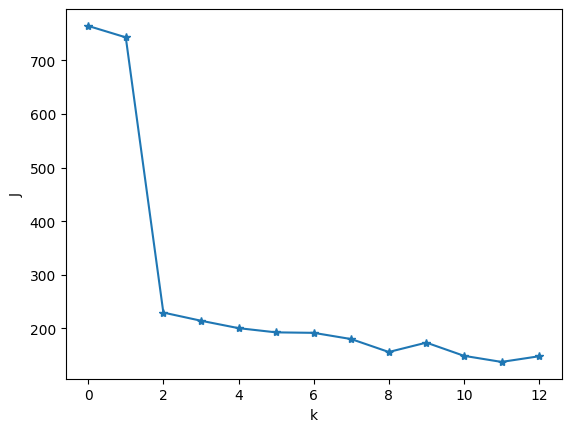

In [77]:
plt.plot(range(len(js)), js, "-*")
plt.xlabel("k")
plt.ylabel("J")

plt.show()

# XB Index Plot

In [78]:
xbs = []
for i in tqdm(range(2, int(np.ceil(np.sqrt(X.shape[0]))))):
    kmedoids = KMedoids(k=i)
    kmedoids.fit(X)
    xbs.append(kmedoids.xb())
    
print(xbs)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 31.05it/s]

[0.40585801739727334, 0.12571253429489562, 0.6241338713951724, 0.747532333528025, 0.622431829312602, 0.9370942977676863, 0.8162328712583156, 0.6771955198860763, 1.8047620832730267, 0.8349610477420133, 1.09953647208761, 0.5524810653927481, 1.1486545528861267]


In [79]:
print(f"The value of the k is using XB index is: {2 + np.argmin(xbs)}")

The value of the k is using XB index is: 3


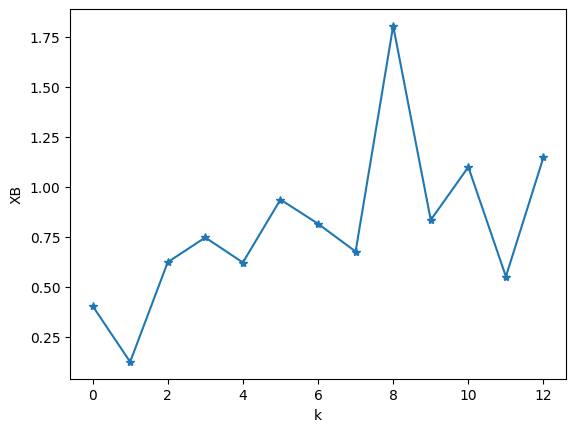

In [81]:
plt.plot(range(len(xbs)), xbs, "-*")
plt.xlabel("k")
plt.ylabel("XB")

plt.show()